In [ ]:
# вариант 28: (0.5) * ln(x + 3) * (cos(x / 4))**2; [0,10]
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def myFunc(x):
  return (0.5) * np.log(x + 3) * (np.cos(x / 4))**2

**Равномерный шаг h**



In [ ]:
def interpolate(func, a, b, N):
  h = (b - a) / (N - 1)
  xnodes = np.arange(a, b + h, h) # interpolation nodes
  ynodes = list(map(func, xnodes)) # function in the interpolation nodes
  xtarget = np.arange(a + (h / 2), b, h) # x*: midpoints between the interpolation nodes
  ytarget = list(map(func, xtarget)) # function in the midpoints between the interpolation nodes
  L = np.zeros(N - 1) # declaration of the Lagrange polynomial

  for k in range(N - 1):
    x = xtarget[k]
    for i in range(N):
      product = 1
      for j in range(N):
        if i != j:
          product = product * (x - xnodes[j]) / (xnodes[i] - xnodes[j])
      L[k] = L[k] + ynodes[i] * product
      
  return xtarget, ytarget, L



In [ ]:
def plotting(xtarget, ytarget, L):
  fig, axs = plt.subplots(2, figsize = (17, 15))
  # plt.figure(figsize = (18, 8))
  axs[0].plot(xtarget, ytarget, color = 'r', label = 'function')
  axs[0].plot(xtarget, L, color = 'b', label = 'Lagrange polynomial')
  axs[1].plot(xtarget, np.abs(L - ytarget), color = 'g', label = 'Errors')
  axs[0].set_title("Function and Lagrange polynomial")
  axs[1].set_title("Errors")
  print("Max absolute error: ", max(abs(L - ytarget)))

  for ax in axs:
    ax.set_xlabel("x")
    ax.set_xticks(np.around(xtarget, decimals = 1))
    ax.tick_params(rotation = 90)
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True)
  plt.show()



Max absolute error:  2.1464482413691144e-09


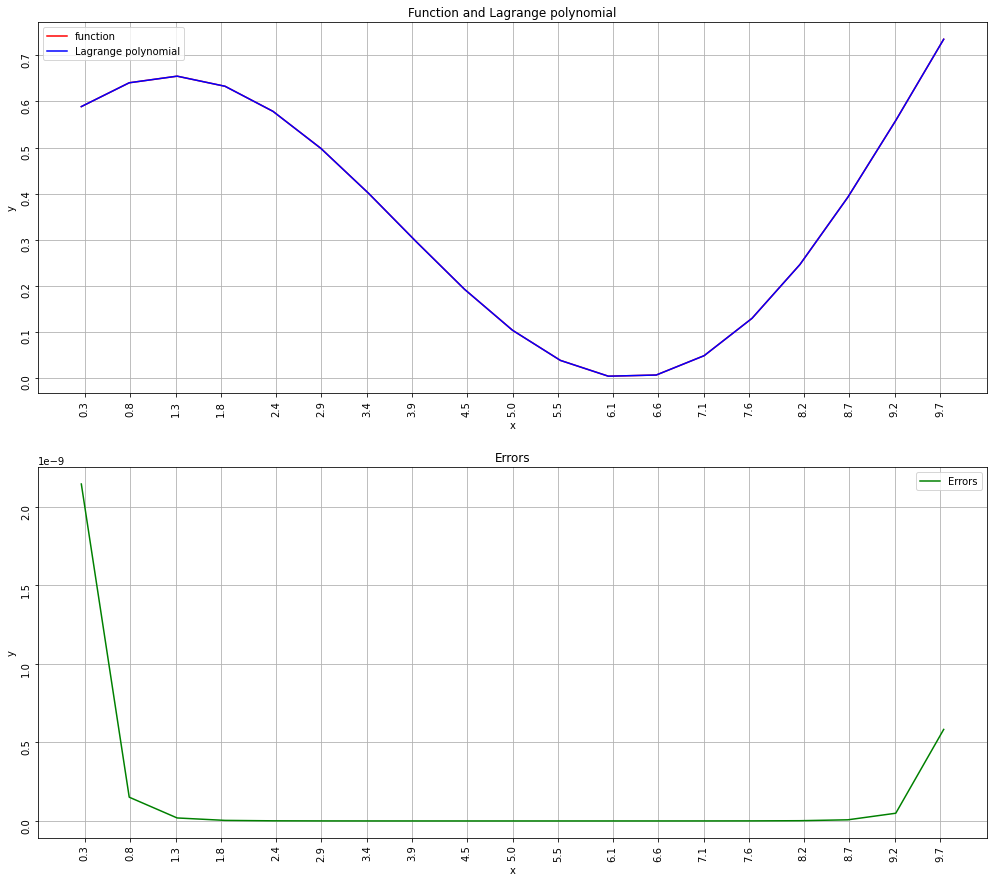

In [ ]:
plotting(*(interpolate(myFunc, 0, 10, 20)))

**Узлы Чебышева**

In [ ]:
def interpolateChebyshev(func, a, b, N):
    xnodes = np.empty(N)
    for i in range(N):
      xnodes[i] = 0.5 * (a + b) + 0.5 * (b - a) * np.cos(((2 * (i + 1) - 1) / (2 * N)) * np.pi)
    ynodes = list(map(func, xnodes))

    xtarget = np.empty(N - 1)
    for i in range(N - 1):
      xtarget[i] = (xnodes[i + 1] + xnodes[i]) / 2
    ytarget = list(map(func, xtarget))

    L = np.zeros(N - 1)

    for k in range(N - 1):
      x = xtarget[k]
      for i in range(N):
        product = 1
        for j in range(N):
          if i != j:
            product = product * (x - xnodes[j]) / (xnodes[i] - xnodes[j])
        L[k] = L[k] + ynodes[i] * product
        
    return xtarget, ytarget, L

Max absolute error:  3.364586387277768e-11


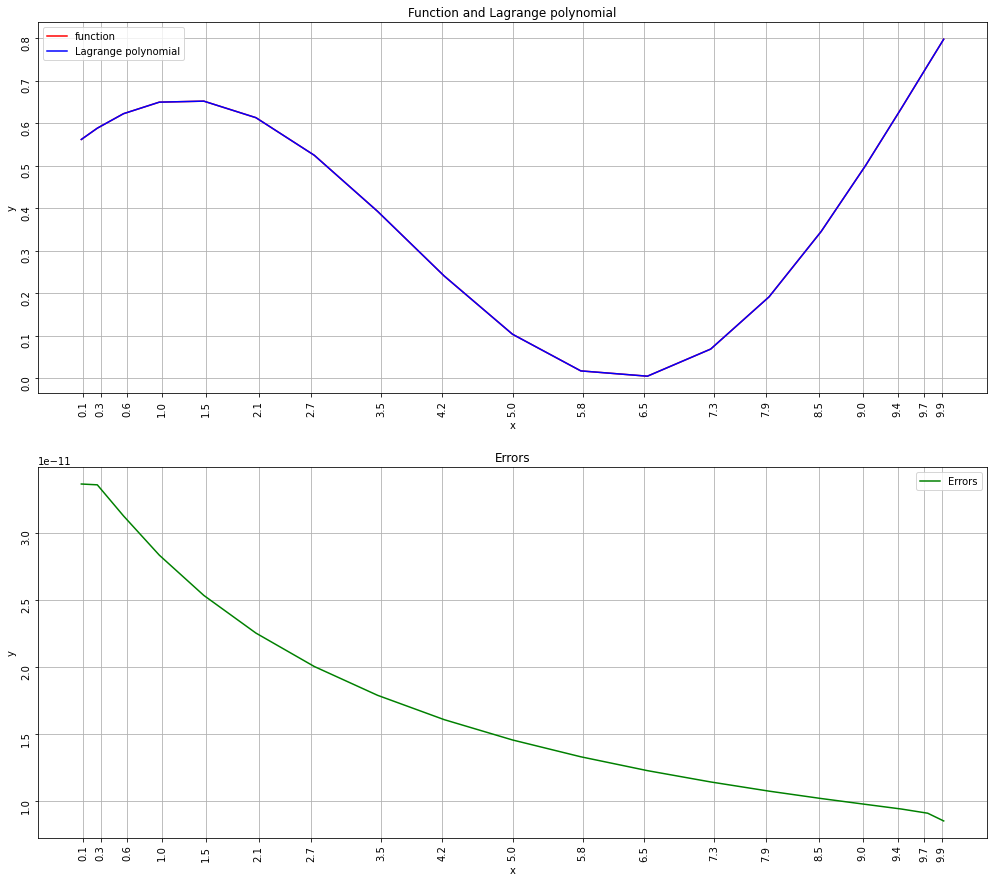

In [ ]:
plotting(*(interpolateChebyshev(myFunc, 0, 10, 20)))